# Introduction 

In this project I will create different models to predict Real Estate 

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [88]:
dataframe = pd.read_csv('nyc-rolling-sales.csv')

# Description

1.This Data Set consists of 22 columns of Data.

2.Properties sold in New York City over a 12-month period from September 2016 to September 2017.

3.Each Borough is associated with a code Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

4.Class 2 properties consisered as income producing properties



In [89]:
dataframe.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data Cleaning and filling missing data
-From the table above we see missing data 

-Many sales occur with a nonsensically small dollar amounts: $0 or " - "

-These sales are actually transfers of deeds between parties: 

-We will be looking to remove these rows from the data set

In [90]:
dataframe.count()

Unnamed: 0                        84548
BOROUGH                           84548
NEIGHBORHOOD                      84548
BUILDING CLASS CATEGORY           84548
TAX CLASS AT PRESENT              84548
BLOCK                             84548
LOT                               84548
EASE-MENT                         84548
BUILDING CLASS AT PRESENT         84548
ADDRESS                           84548
APARTMENT NUMBER                  84548
ZIP CODE                          84548
RESIDENTIAL UNITS                 84548
COMMERCIAL UNITS                  84548
TOTAL UNITS                       84548
LAND SQUARE FEET                  84548
GROSS SQUARE FEET                 84548
YEAR BUILT                        84548
TAX CLASS AT TIME OF SALE         84548
BUILDING CLASS AT TIME OF SALE    84548
SALE PRICE                        84548
SALE DATE                         84548
dtype: int64

removing unwanted columns

In [91]:
del dataframe['EASE-MENT']
del dataframe['APARTMENT NUMBER']
del dataframe['Unnamed: 0']


In [92]:
#Dropping Data

dataframe['SALE_PRICE'] = dataframe['SALE PRICE']
new_df = dataframe[~dataframe.SALE_PRICE.str.contains("-")]

In [93]:
#Drop Missing Values

new_df['LAND_SQUARE_FEET'] = new_df['LAND SQUARE FEET']

new_df = new_df[~new_df.LAND_SQUARE_FEET.str.contains("-")]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
new_df['GROSS_SQUARE_FEET'] = new_df['GROSS SQUARE FEET']
new_df = new_df[~new_df.GROSS_SQUARE_FEET.str.contains("-")]

In [95]:
#Turning Sale_price Numeric
new_df['SALE_PRICE'] = pd.to_numeric(new_df['SALE_PRICE'], errors='coerce')

#Turning LAND_SQUARE_FEET Numeric
new_df['LAND_SQUARE_FEET'] = pd.to_numeric(new_df['LAND_SQUARE_FEET'], errors='coerce')

#Turning GROSS_SQUARE_FEET Numeric
new_df['GROSS_SQUARE_FEET'] = pd.to_numeric(new_df['GROSS_SQUARE_FEET'], errors='coerce')

In [96]:
#removing zero from the dates




In [97]:
#Checking For Duplicates
sum(new_df.duplicated(new_df.columns))

348

In [98]:
#Delete the duplicates and check that it worked
new_df = new_df.drop_duplicates(new_df.columns, keep='last')
sum(new_df.duplicated(new_df.columns))

0

In [99]:
new_df['BOROUGH'].describe()


count    47896.000000
mean         3.254948
std          0.901887
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: BOROUGH, dtype: float64

#Removing Outliers 

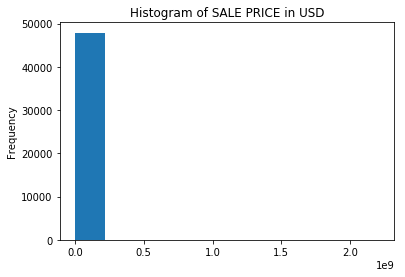

In [101]:
plt.hist(new_df["SALE_PRICE"])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Frequency')
plt.show()

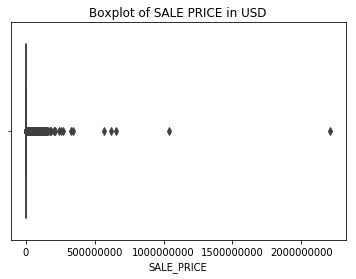

In [102]:
# Plot the data and configure the settings
sns.boxplot(x='SALE_PRICE', data=new_df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

The Sale price has a wide range of values.

We will need to remove values that are anything below the mean 100000 and any values that are higher than 5million

In [105]:
# #Removing Outliers and Data Below 100,000 and above  caps 
new_df = new_df[(new_df['SALE_PRICE'] > 100000) & (new_df['SALE_PRICE'] < 5000000)]
len(new_df)


34702

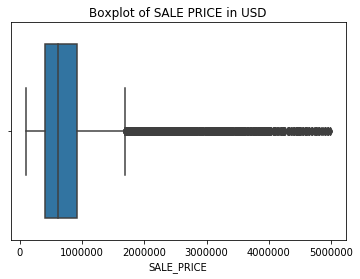

In [114]:
sns.boxplot(x='SALE_PRICE', data=new_df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [111]:
# Keeps properties with fewer than 20,000 Square Feet,
new_df = new_df[new_df['GROSS_SQUARE_FEET'] < 20000]

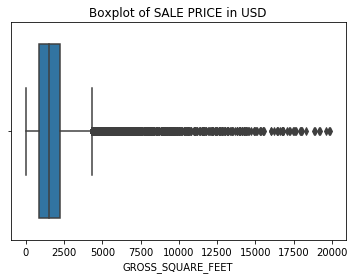

In [112]:
sns.boxplot(x='GROSS_SQUARE_FEET', data=new_df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

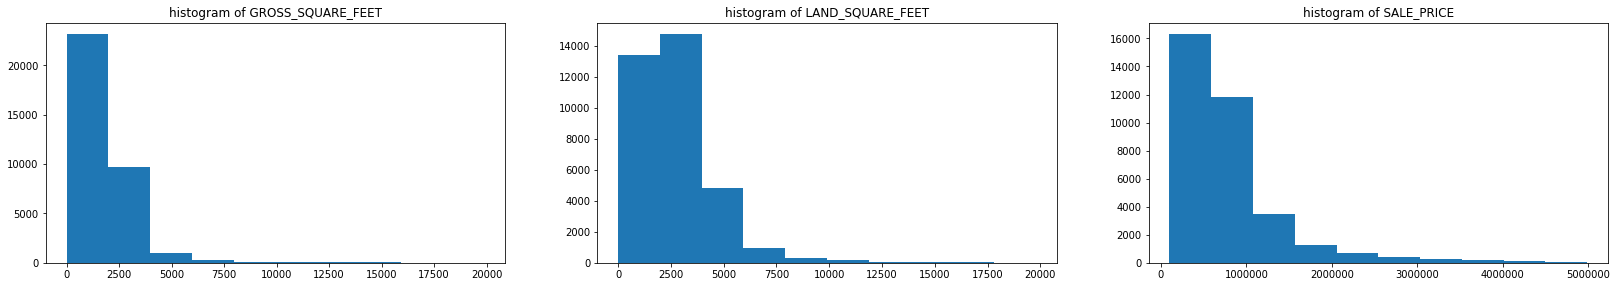

In [115]:
plt.figure(figsize=(28,15))



# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(new_df["GROSS_SQUARE_FEET"])
plt.title("histogram of GROSS_SQUARE_FEET")


plt.subplot(3, 3, 2)
plt.hist(new_df["LAND_SQUARE_FEET"])
plt.title("histogram of LAND_SQUARE_FEET")

plt.subplot(3, 3, 3)
plt.hist(new_df["SALE_PRICE"])
plt.title("histogram of SALE_PRICE")

plt.show()





Each number represents a borough 

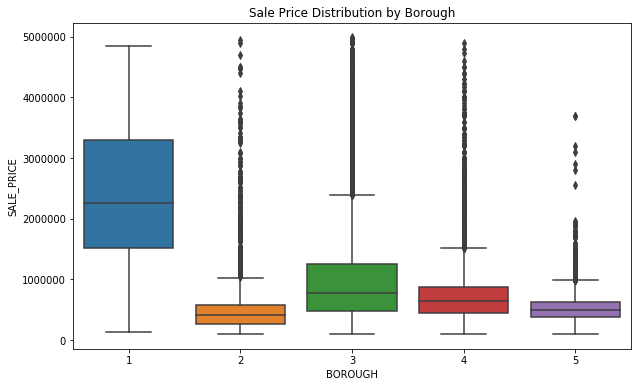

In [117]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE_PRICE', data=new_df)
plt.title('Sale Price Distribution by Borough')
plt.show()

Each Borough is associated with a code 
Manhattan (1)
Bronx (2)
Brooklyn (3)
Queens (4)
Staten Island (5).

In [100]:
# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 1] = 'Manhattan'
# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 2] = 'Bronx'
# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 3] = 'Brooklyn'
# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 4] = 'Queens'
# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 5] = 'Staten Island'

In [125]:
# Add a function to minus year sold to year build to see the age of the building

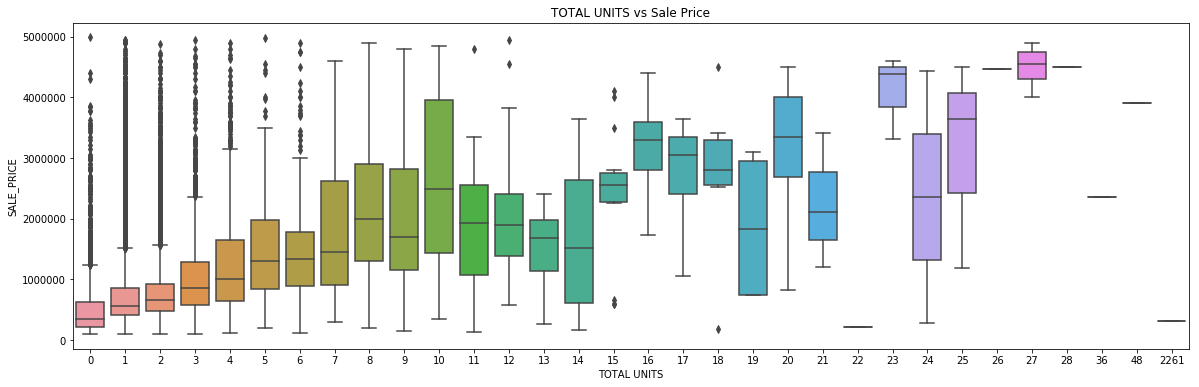

In [118]:
plt.figure(figsize=(20,6))
sns.boxplot(x='TOTAL UNITS', y='SALE_PRICE', data=new_df)
plt.title('TOTAL UNITS vs Sale Price')
plt.show()

Text(0, 0.5, 'LAND_SQUARE_FEET')

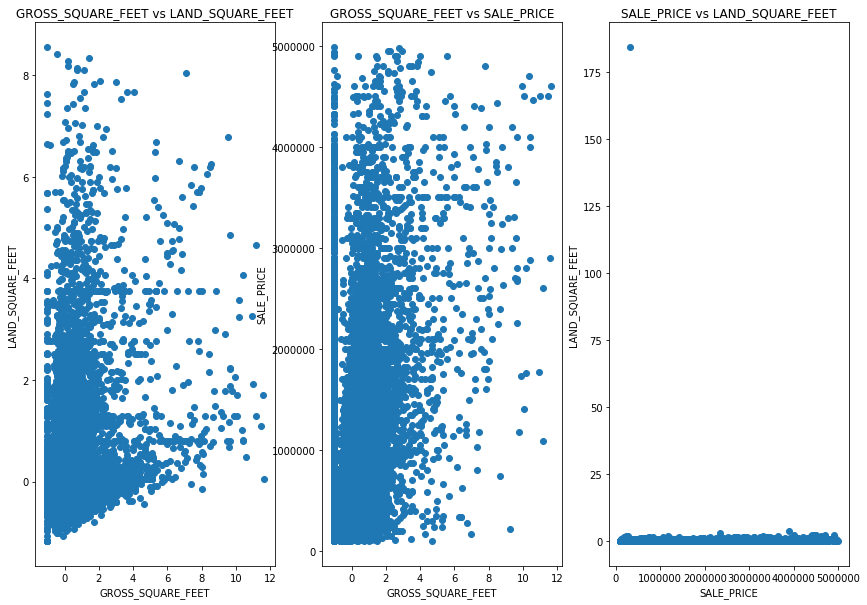

In [127]:
plt.figure(figsize=(30,10))

plt.subplot(1,6,1)
plt.scatter(new_df["GROSS_SQUARE_FEET"], new_df["LAND_SQUARE_FEET"])
plt.title("GROSS_SQUARE_FEET vs LAND_SQUARE_FEET")
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('LAND_SQUARE_FEET')

plt.subplot(1,6,2)
plt.scatter(new_df["GROSS_SQUARE_FEET"], new_df["SALE_PRICE"])
plt.title("GROSS_SQUARE_FEET vs SALE_PRICE")
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')

plt.subplot(1,6,3)
plt.scatter(new_df["SALE_PRICE"], new_df["TOTAL UNITS"])
plt.title("SALE_PRICE vs LAND_SQUARE_FEET")
plt.xlabel('SALE_PRICE')
plt.ylabel('LAND_SQUARE_FEET')



Postitive relationships has been shown from following graphs to the sale price

In [120]:
def data_function(data1,data2):

    new_df1 = pd.DataFrame()
    new_df1['SALE_PRICE'] = (new_df['SALE_PRICE'] - new_df['SALE_PRICE'].mean()) / new_df['SALE_PRICE'].std()
    new_df[data1] = (new_df[data1] - new_df[data1].mean()) / new_df[data1].std()

    t = sns.regplot(
    data1,
    'SALE_PRICE',
    new_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
    )
    t.axhline(0, color='k', linestyle='-', linewidth=2)
    t.axvline(0, color='k', linestyle='-', linewidth=2)
    t.axes.set_title(data2)

    sns.regplot(data1,'SALE_PRICE',
            new_df, 
            scatter=False, 
            color="red")

    plt.show()
    
    
    

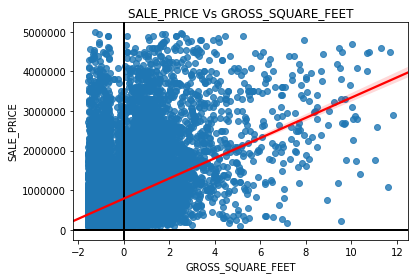

In [121]:
data_function('GROSS_SQUARE_FEET',"SALE_PRICE Vs GROSS_SQUARE_FEET")

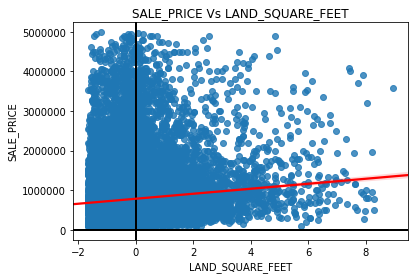

In [122]:
data_function('LAND_SQUARE_FEET',"SALE_PRICE Vs LAND_SQUARE_FEET")

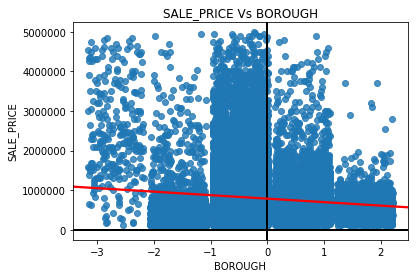

In [123]:
data_function('BOROUGH',"SALE_PRICE Vs BOROUGH")

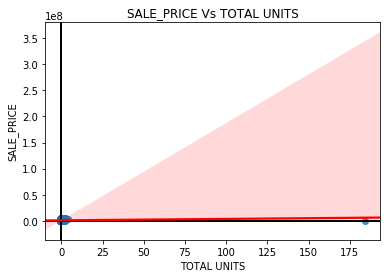

In [124]:
data_function('TOTAL UNITS',"SALE_PRICE Vs TOTAL UNITS")